# Predict bias correction through regression
( Next day Min and Max temperatures separately )

# Load and take a look at the data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
ds=pd.read_csv('Bias_correction_ucl.csv')

In [3]:
ds.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
ds.shape

(7752, 25)

In [5]:
ds.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Check and treat null values

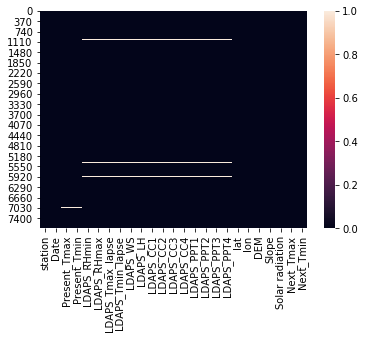

In [6]:
sns.heatmap(ds.isnull())

In [7]:
ds.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
# Replace NaN with np.nan so that the rows can be dropped, and drop the rows containing np.nan
ds.replace('NaN', np.nan, inplace = True)
ds = ds.dropna()

In [9]:
ds.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
# Check that rows have been dropped
ds.shape

(7588, 25)

# Check correlation

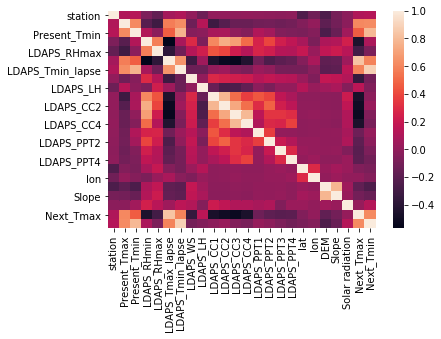

In [11]:
dscor=ds.corr()
sns.heatmap(dscor)

In [12]:
ds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Next T Max correlations:

Best:LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax, Present_Tmin, Next_Tmin

Worst:(Negative correlation)
LDAPS_RHmin, LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmax
    

Next T Min correlations:
    
Best:LDAPS_Tmax_lapse, Present_Tmin, Present_Tmax, LDAPS_Tmax_lapse, Next_Tmax
    
Worst: ( Much better than Tmax)
DEM
    

# Summary statistics

In [13]:
ds.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# Data visualizations

In [14]:
ds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

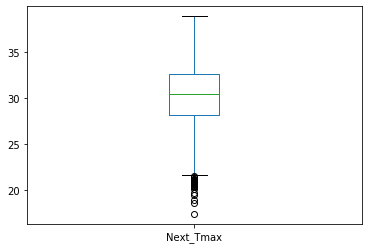

In [15]:
# Check for outliers
ds['Next_Tmax'].plot.box()

Some outliers present

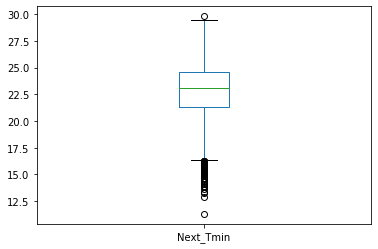

In [16]:
# Check for outliers
ds['Next_Tmin'].plot.box()

Some outliers present. The mean values indicate that most of the data was taken during the summer.

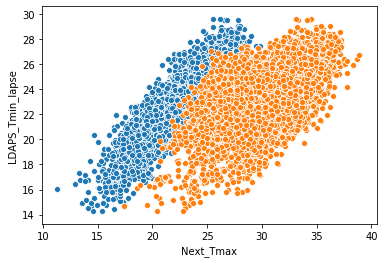

In [17]:
# Check the relationship between both target columns and a single variable
sns.scatterplot(x='Next_Tmin',y='LDAPS_Tmin_lapse',data=ds)
sns.scatterplot(x='Next_Tmax',y='LDAPS_Tmin_lapse',data=ds)

Both the target columns show linear correlation to the LADPS Tmin lapse, but the min target's correlation is greater.

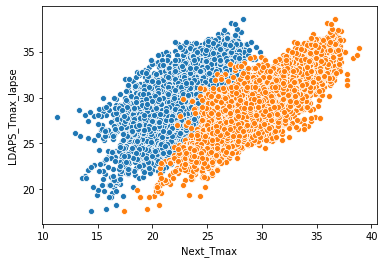

In [18]:
# Check the relationship between both target columns and a single variable
sns.scatterplot(x='Next_Tmin',y='LDAPS_Tmax_lapse',data=ds)
sns.scatterplot(x='Next_Tmax',y='LDAPS_Tmax_lapse',data=ds)

Both the target columns show linear correlation to the LADPS Tmax lapse, but the max target's correlation is greater.

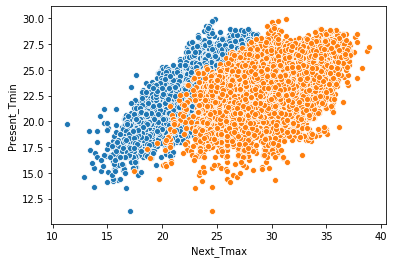

In [19]:
# Check the relationship between both target columns and a single variable
sns.scatterplot(x='Next_Tmin',y='Present_Tmin',data=ds)
sns.scatterplot(x='Next_Tmax',y='Present_Tmin',data=ds)

Both the target columns show linear correlation to the Present Tmin, but the min target's correlation is greater.

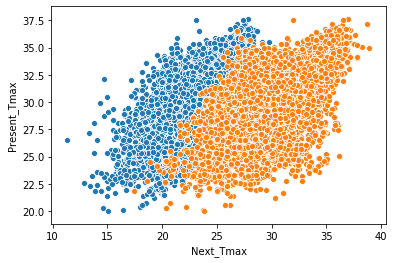

In [20]:
# Check the relationship between both target columns and a single variable
sns.scatterplot(x='Next_Tmin',y='Present_Tmax',data=ds)
sns.scatterplot(x='Next_Tmax',y='Present_Tmax',data=ds)

In this case both the target columns seem to correlate to the Present Tmax variable equally.

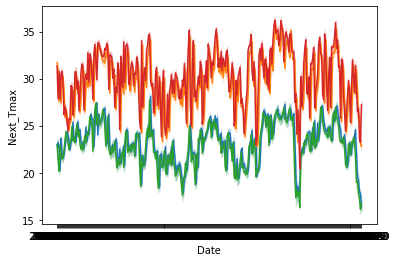

In [21]:
# Check the relationship between both target columns and a single variable
sns.lineplot(x='Date',y='Present_Tmin',data=ds)
sns.lineplot(x='Date',y='Present_Tmax',data=ds)
sns.lineplot(x='Date',y='Next_Tmin',data=ds)
sns.lineplot(x='Date',y='Next_Tmax',data=ds)

Present Time and Next Time measurements are very closely related for both min and max values.

# Encode categorical columns to numeric values

In [22]:
eds=ds

In [23]:
# Encode one or specific columns in a dataset
from sklearn.preprocessing import LabelEncoder

Encoderds = LabelEncoder() 
eds['Date'] = Encoderds.fit_transform(eds['Date'])

# Drop irrelevant columns

In [24]:
ds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Next T Max correlations:

Best:LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax, Present_Tmin, Next_Tmin

Worst:(Negative correlation) LDAPS_RHmin, LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmax

Next T Min correlations:

Best:LDAPS_Tmax_lapse, Present_Tmin, Present_Tmax, LDAPS_Tmax_lapse, Next_Tmax

Worst: ( Much better than Tmax) DEM

In [25]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds

In this case only the strongly correlated columns were kept as they are the same for both the target columns.

# Find and remove outliers

In [26]:
nds.shape

(7588, 25)

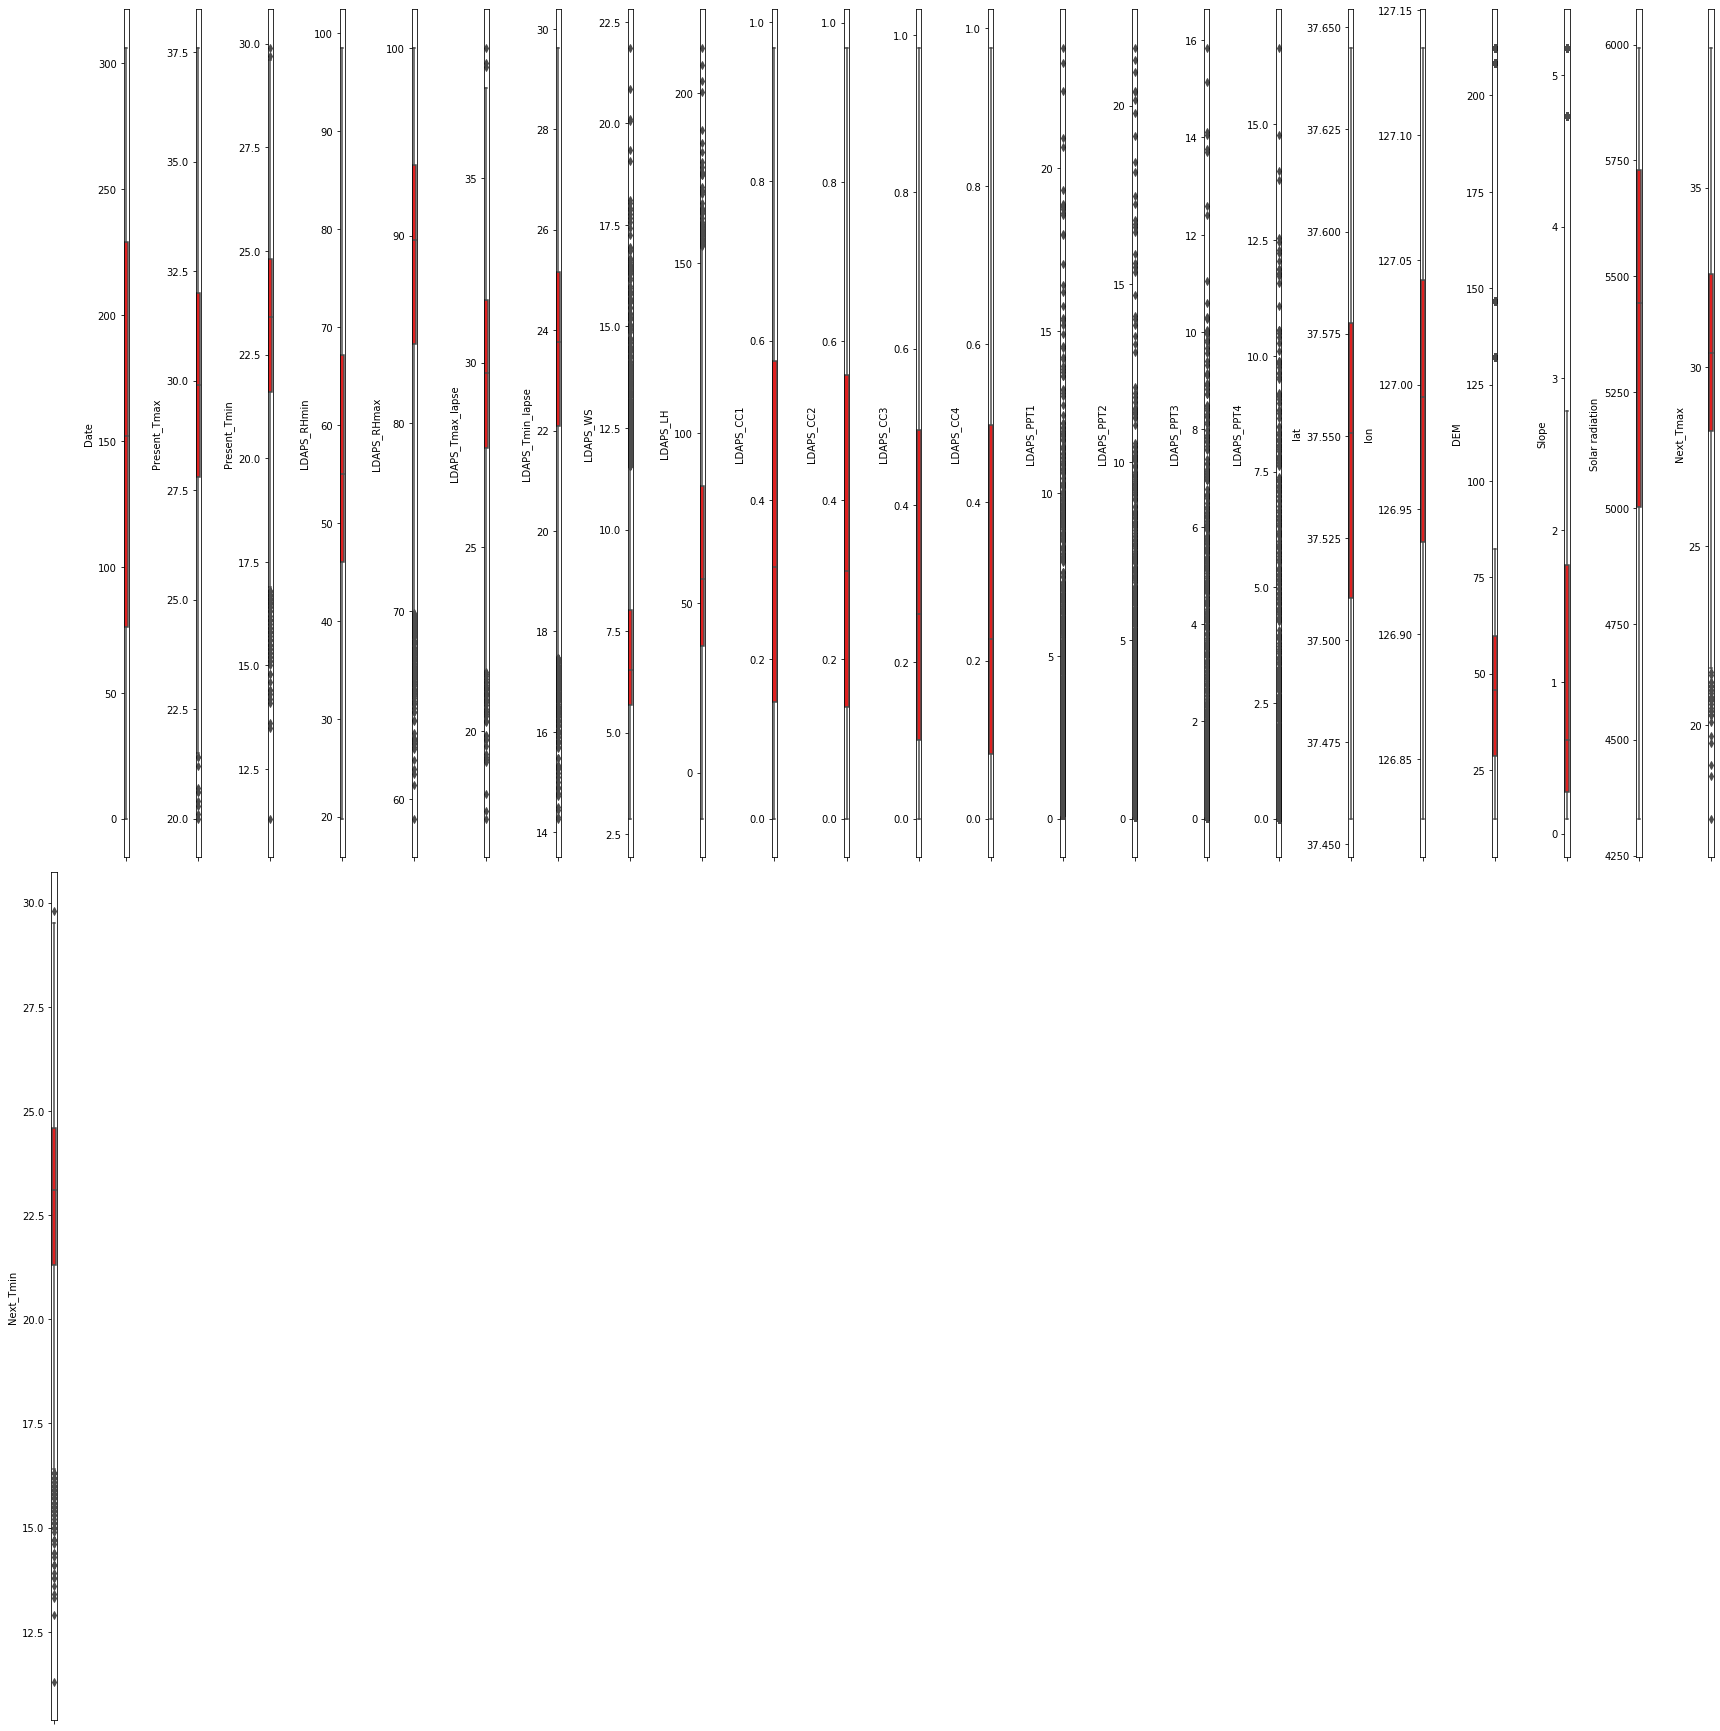

In [27]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=24
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [28]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(7588, 25)
(6739, 25)


# Check and adjust skewness

In [29]:
# Show skewness (less than 0.55 is ok)
cds.skew()

station            -0.001594
Date                0.011953
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

# Split data into x and y for  Next Tmax

In [30]:
cds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [ ]:
# Lineup target and input values
cds_x=cds.drop(columns=['Next_Tmax'])
y=cds[['Next_Tmax']]

# Apply PCA to reduce the amount of x columns

In [32]:
# Apply PCA to reduce the amount of input columns
from sklearn.decomposition import PCA
pca=PCA(n_components=15) 
cds_x.shape

(6739, 24)

In [33]:
cds_array=pca.fit_transform(cds_x)
x=pd.DataFrame(cds_array)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-655.712984,-126.807828,148.757526,2.767065,-6.489502,6.145385,-2.860216,0.776099,-0.830900,1.029846,-0.810663,-0.288192,1.290146,-0.890390,-0.032599
1,-530.901827,-134.050219,-18.599409,-2.562128,-6.487654,11.922347,-0.280499,-1.366434,-0.397495,3.094423,0.811973,-0.627868,0.592468,-0.278169,-0.369450
2,-525.092944,-135.348457,-32.494562,-33.298624,-11.280541,11.691626,-3.576948,-0.854152,0.148941,2.031821,-0.702439,-0.958336,0.486738,-0.066525,-0.196289
3,-518.599789,-134.078712,-16.360700,11.270512,0.948959,9.536927,2.024622,-4.190627,-0.186859,2.949321,-0.358825,-1.494283,-1.358418,0.571014,-0.211545
4,-520.961166,-132.720086,-24.249853,53.690141,-2.879435,6.989652,-3.238561,1.807039,-0.878962,2.079013,0.207045,-0.668651,0.497174,-0.249796,-0.331446


# Apply scaler

In [34]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [35]:
x.skew()

station            -0.001594
Date                0.011953
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmin          -0.234328
dtype: float64

# Train-Test split

In [36]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [38]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 84 is 0.8081261260566394


In [39]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

0.681817401515276

In [40]:
# R2 score gives us a rondom state of 51
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=51, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [41]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.7688842375641075
RMSE is:  1.3887639544772539


# Other regression models

In [42]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.785543607555317
0.8622615135891839
0.8971657411694702


In [45]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)

0.8971657411694702


I choose the SVR(rbf) model because it has the best score

Score: 89.7


# Save the model for Next Tmax

In [46]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(svr,'Bias_Max.pkl')

['Bias_Max.pkl']

In [47]:
# Load and use model to make a prediction
model=joblib.load('Bias_Max.pkl')
model.predict(x_test)

array([31.39732788, 29.24304478, 31.51729644, ..., 31.28342033,
       31.704514  , 33.27921292])

# Split data into x and y for  Next Tmin

In [48]:
# Lineup target and input values
cds_x=cds.drop(columns=['Next_Tmin'])
y=cds[['Next_Tmin']]

# Apply PCA to reduce the amount of x columns

In [49]:
# Apply PCA to reduce the amount of input columns
from sklearn.decomposition import PCA
pca=PCA(n_components=15) 
cds_x.shape

(6739, 24)

In [50]:
cds_array=pca.fit_transform(cds_x)
x=pd.DataFrame(cds_array)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-655.714154,-126.807879,148.746522,2.789799,-6.493598,6.175116,-2.819047,0.763954,-0.231236,1.300454,-0.846454,-0.200860,-0.686968,1.410929,-0.022042
1,-530.902150,-134.047465,-18.610840,-2.554872,-6.478394,11.914075,-0.245161,-1.500758,0.485158,3.000095,0.693244,0.811089,-0.517605,0.454632,0.538583
2,-525.092525,-135.346817,-32.493380,-33.276853,-11.380059,11.746301,-3.379942,-0.781985,0.724265,2.034100,0.147285,-0.624899,-0.452339,0.542944,0.534134
3,-518.599092,-134.075417,-16.363010,11.296845,0.796331,9.521869,2.194603,-4.278461,0.297822,2.985547,1.059085,-1.034625,-0.393225,-1.246065,0.524924
4,-520.961377,-132.714108,-24.272158,53.698792,-2.846373,6.981895,-3.372171,1.441857,-0.487783,2.228961,0.401193,0.160242,-0.508412,0.494902,0.581597


# Apply scaler

In [51]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [52]:
x.skew()

station            -0.001594
Date                0.011953
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
dtype: float64

# Train-Test split

In [53]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

In [54]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8380021258101383
0.8952165542915644
0.9315380246036846


In [55]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)

0.9315380246036846


I choose the SVR(rbf) model because it has the best score

Score: 93.2


In [56]:
# Save the model for Next Tmin

In [57]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(svr,'Bias_Min.pkl')

['Bias_Min.pkl']

In [58]:
# Load and use model to make a prediction
model=joblib.load('Bias_Min.pkl')
model.predict(x_test)

array([20.42244336, 22.5862275 , 23.04922662, ..., 23.1086075 ,
       27.46569982, 18.7313717 ])